# Regression Problems:

### Predicting the Price of Houses.

### 1- General Statistics:

In [72]:
# Libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Librariesfor Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Libraries for Machine Learning Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [73]:
# import data
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/02. Reg. Linear e Regularização/house_price.csv")

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1460 non-null   int64 
 1   SalePrice     1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   BedroomAbvGr  1460 non-null   int64 
 5   TotRmsAbvGrd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   MSZoning      1460 non-null   object
 10  Utilities     1460 non-null   object
 11  BldgType      1460 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB


In [75]:
df.dtypes

,0
Unnamed: 0,int64
SalePrice,int64
OverallQual,int64
OverallCond,int64
BedroomAbvGr,int64
TotRmsAbvGrd,int64
GrLivArea,int64
TotalBsmtSF,int64
YearBuilt,int64
MSZoning,object


In [76]:
def check_is_null(df):
  result = df.isnull().sum()
  print(f"Quantidade de nulos no dataframe:")
  return result

def check_duplicated(df):
  result = df.duplicated().sum()
  print(f"Quantidade de duplicados no dataframe:")
  return int(result)



In [77]:
check_is_null(df)

Quantidade de nulos no dataframe:


,0
Unnamed: 0,0
SalePrice,0
OverallQual,0
OverallCond,0
BedroomAbvGr,0
TotRmsAbvGrd,0
GrLivArea,0
TotalBsmtSF,0
YearBuilt,0
MSZoning,0


In [78]:
check_duplicated(df)

Quantidade de duplicados no dataframe:


0

In [79]:
df.describe()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,180921.195890,6.099315,5.575342,2.866438,6.517808,1515.463699,1057.429452,1971.267808
std,421.610009,79442.502883,1.382997,1.112799,0.815778,1.625393,525.480383,438.705324,30.202904
min,0.000000,34900.000000,1.000000,1.000000,0.000000,2.000000,334.000000,0.000000,1872.000000
25%,364.750000,129975.000000,5.000000,5.000000,2.000000,5.000000,1129.500000,795.750000,1954.000000
50%,729.500000,163000.000000,6.000000,5.000000,3.000000,6.000000,1464.000000,991.500000,1973.000000
75%,1094.250000,214000.000000,7.000000,6.000000,3.000000,7.000000,1776.750000,1298.250000,2000.000000
max,1459.000000,755000.000000,10.000000,9.000000,8.000000,14.000000,5642.000000,6110.000000,2010.000000


(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 122., 130., 121.,
         78.,  61.,  64.,  49.,  36.,  36.,  25.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <BarContainer object of 50 artists>)

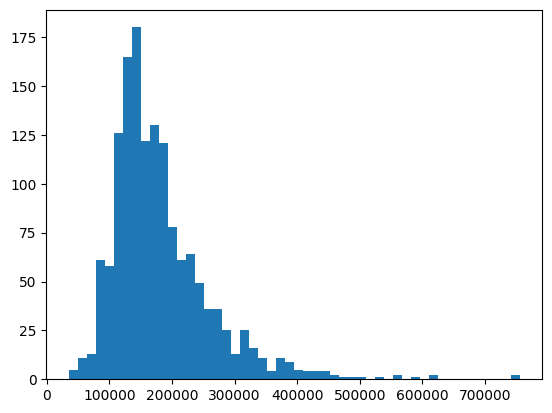

In [80]:
plt.hist(df.SalePrice, bins=50)

The distribution of the sale value of houses does not follow a normal. We can verify this by looking at the value of skewness.

In [81]:
#Calculating the Value of Skewness
float(df.SalePrice.skew())

1.8828757597682129

A positive skewness indicates an elongated tail to the right side.

In [82]:
# Looking at the value of the mean and standard deviation of SalesPrice

print(f"Mean: {df.SalePrice.mean():.2f}")
print(f"Standard deviation: {df.SalePrice.std():.2f}")

Mean: 180921.20
Standard deviation: 79442.50


In [83]:
#Key statistical measures for SalesPrice
mean_price = df.SalePrice.mean()
std_price = df.SalePrice.std()
min_price = df.SalePrice.min()
max_price = df.SalePrice.max()

print(f"Mean Price: {mean_price:.2f}")
print(f"Standard deviation of prices: {std_price:.2f}")
print(f"Minimum price: {min_price:.2f}")
print(f"Maximum price: {max_price:.2f}")



Mean Price: 180921.20
Standard deviation of prices: 79442.50
Minimum price: 34900.00
Maximum price: 755000.00


We have an average of 180k and a standard deviation of approximately 80k, which is a pretty high value. In other words, we have very dispersed data in relation to the average. and some outliers that pull this value up.

<Axes: ylabel='SalePrice'>

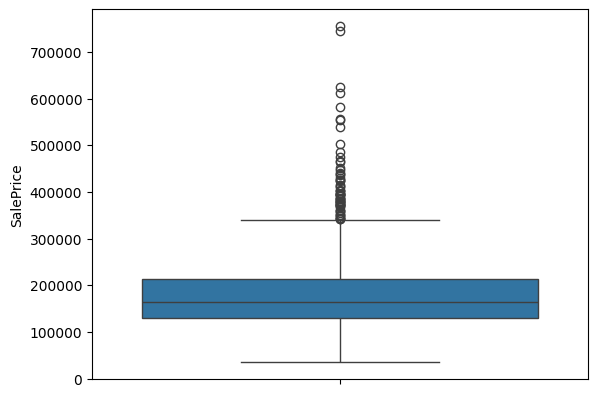

In [84]:
#boxplot for SalesPrice
sns.boxplot(df.SalePrice)

With the information above, we realize that, in fact, there are some houses being sold at a much higher value than the average. This can be seen in the outliers in the boxplot and the long tail in the histogram.

It was possible to see that a house can be sold from 34.9K (minimum value) and reach up to 755K (maximum value)

---
### **Hypotheses**

Of the numerical variables, we can think of some hypotheses:

1. The average/median quality of the property is higher for the most expensive apartments
2. The average/median number of rooms/bedrooms/area/bathrooms is higher in more expensive apartments
3. The most expensive apartments are older

Of the **categorical** variables, we can think of some hypotheses:
4. There is a price difference according to your location (zone)
5. The utilities (gas, water, etc.) in the house have an influence on the price
6. The type of housing influences the price (duplex, condominium, etc.)


Let's try to understand what affects the price of houses. For this we will do some analysis and perform some hypothesis tests to verify the premises.

#### 1. Numerical Variables:

In [85]:
#creating categories to define expensive and cheap house.

df["categoria_preco"] = df.SalePrice.apply(
    lambda x: "cara" if x >= mean_price*1.5 else "barata"
)

In [86]:
#Average quality of cheap/expensive houses
df.groupby("categoria_preco").OverallQual.mean()

,OverallQual
categoria_preco,
barata,5.826255
cara,8.242424


In [87]:
colunas_numericas = df.select_dtypes(include=np.number).columns

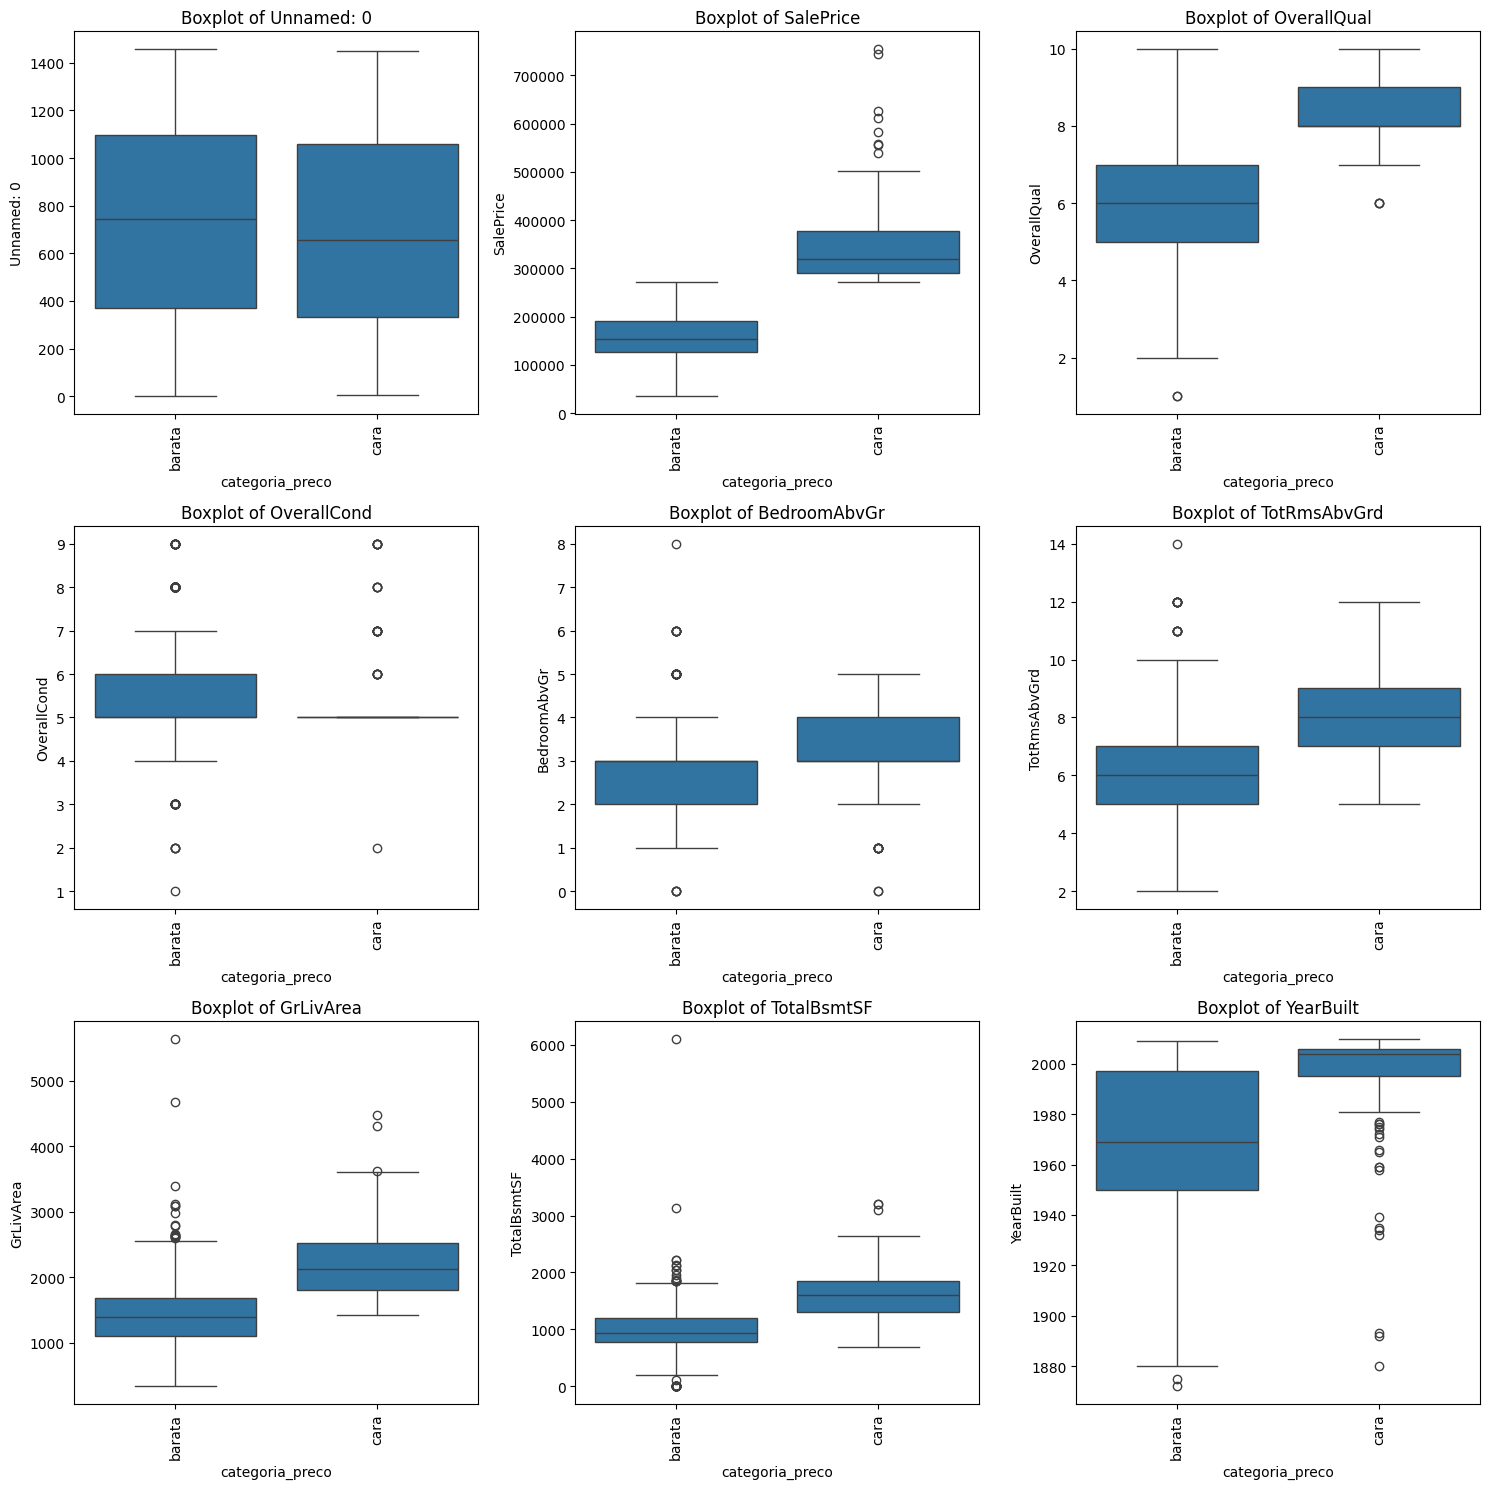

In [88]:
# Number of numeric columns
num_cols = len(colunas_numericas)

# Set the number of rows and columns for the chart grid
cols = 3  # Number of columns in the grid
rows = math.ceil(num_cols / cols)  # Calculate the required number of rows

# Create the figure and the axes for the chart grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate the boxplots
for idx, col in enumerate(colunas_numericas):
    sns.boxplot(x="categoria_preco", y=col, data=df, ax=axes[idx])
    axes[idx].set_title(f"Boxplot of {col}")
    axes[idx].tick_params(axis='x', rotation=90)

# Remove empty axes (if the number of plots is not a multiple of cols)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

It seems that expensive houses have better statistics regarding the overall condition of the house. That is, more expensive houses have conditions with better evaluations.

#### Correlations:

Let's check the correlation between the features and our target:

In [89]:
target = "SalePrice"
features = df.select_dtypes(include=np.number).drop(columns=target).columns

for feature in features:
  correlation = df[feature].corr(df[target])
  print(f"Correlation between feature {feature} and target: {correlation}")

Correlation between feature Unnamed: 0 and target: -0.021916719443431116
Correlation between feature OverallQual and target: 0.7909816005838044
Correlation between feature OverallCond and target: -0.07785589404867803
Correlation between feature BedroomAbvGr and target: 0.16821315430073988
Correlation between feature TotRmsAbvGrd and target: 0.5337231555820282
Correlation between feature GrLivArea and target: 0.7086244776126523
Correlation between feature TotalBsmtSF and target: 0.6135805515591956
Correlation between feature YearBuilt and target: 0.5228973328794969


Let's visualize it in a scater plot:

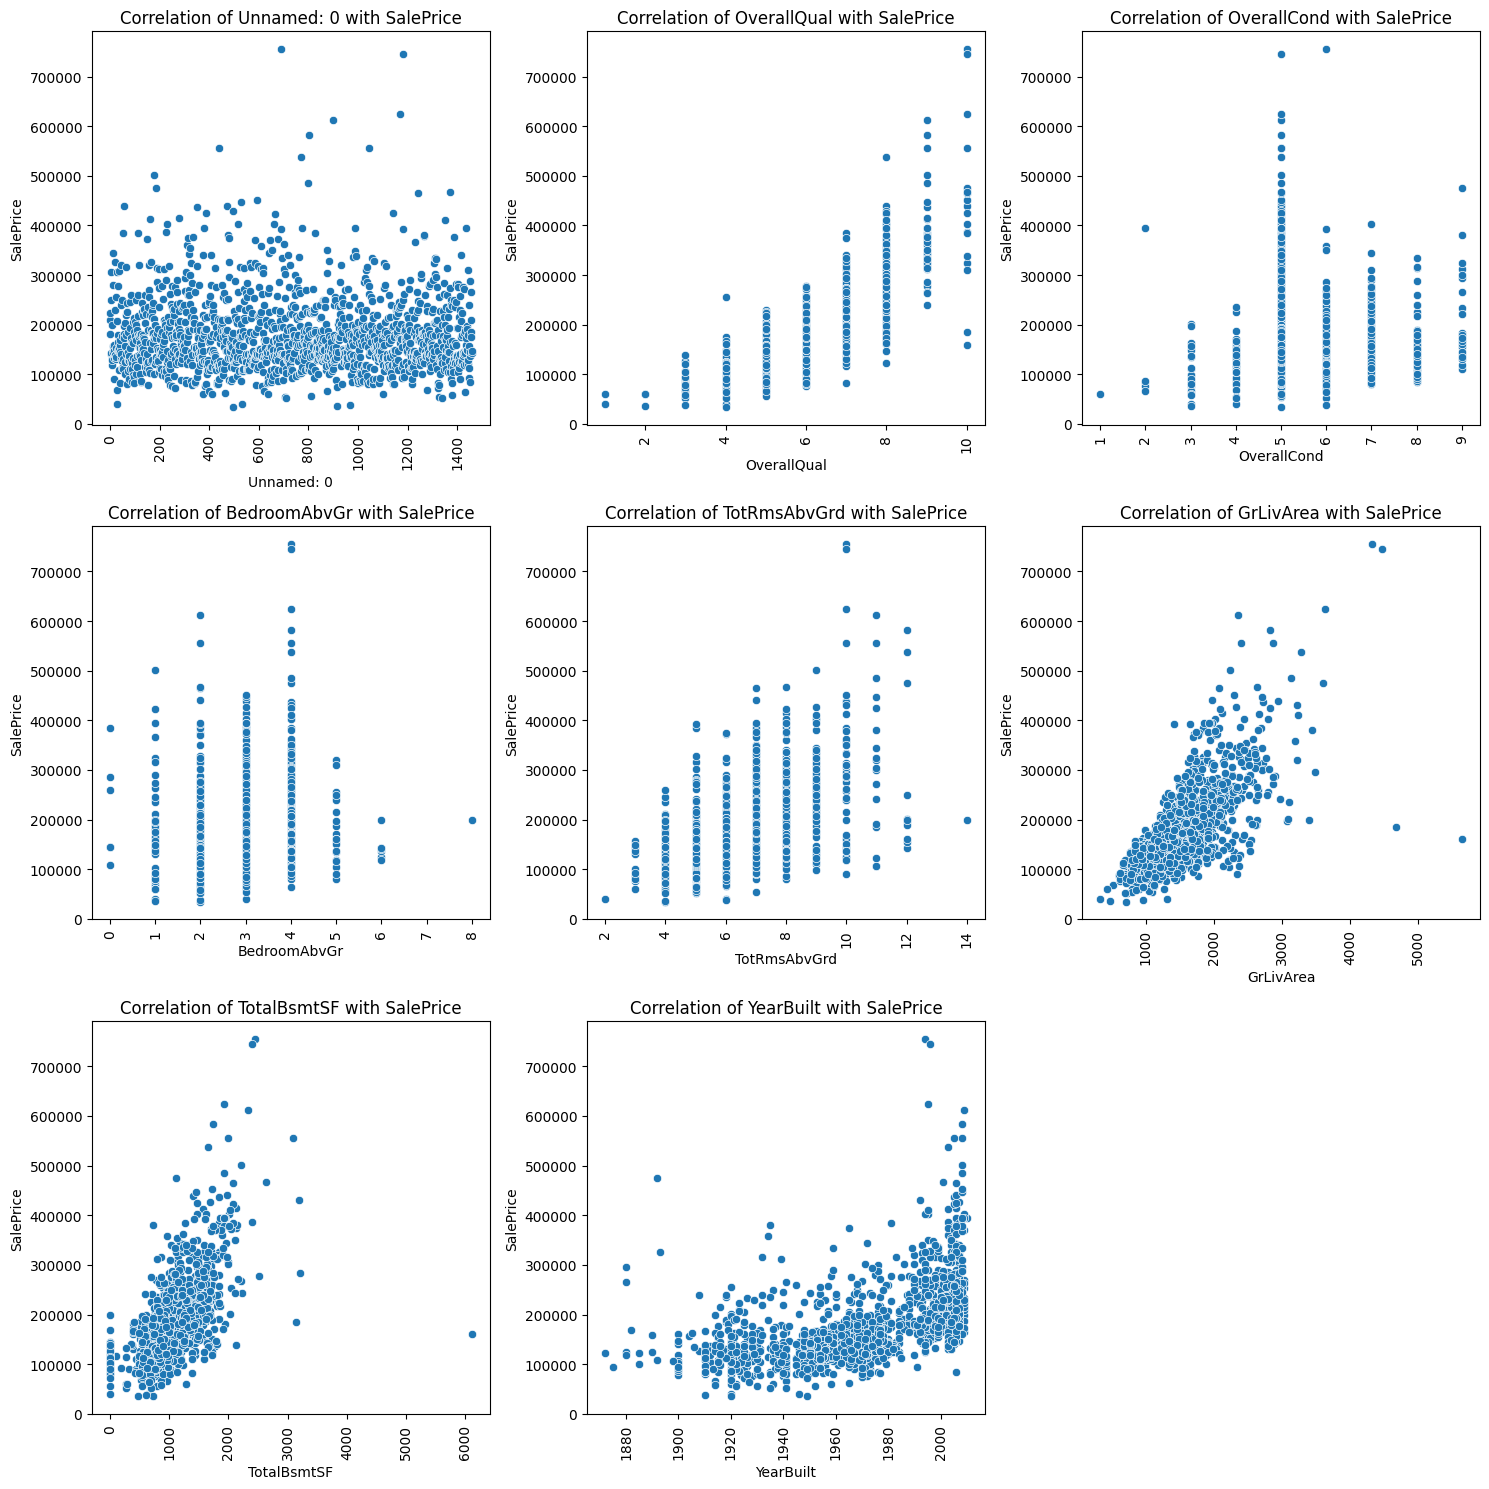

In [90]:
# Number of numeric columns
num_features = len(features)

# Set the number of rows and columns for the chart grid
cols = 3  # Number of columns in the grid
rows = math.ceil(num_features / cols)  # Calculate the required number of rows

# Create the figure and the axes for the chart grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate the scatter plots
for idx, col in enumerate(features):
    sns.scatterplot(x=col, y=target, data=df, ax=axes[idx])  # Fixed `x=col`
    axes[idx].set_title(f"Correlation of {col} with {target}")  # Fixed title formatting
    axes[idx].tick_params(axis='x', rotation=90)

# Remove empty axes (if the number of plots is not a multiple of cols)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

There are features that have stronger correlations with SalePrice, namely:
- TotalBsmtSF;
- GrLivArea;
- OverallQual.

#### 2- Categorical Variables:

Let's analyze the boxplot between the categorical variables and our target.

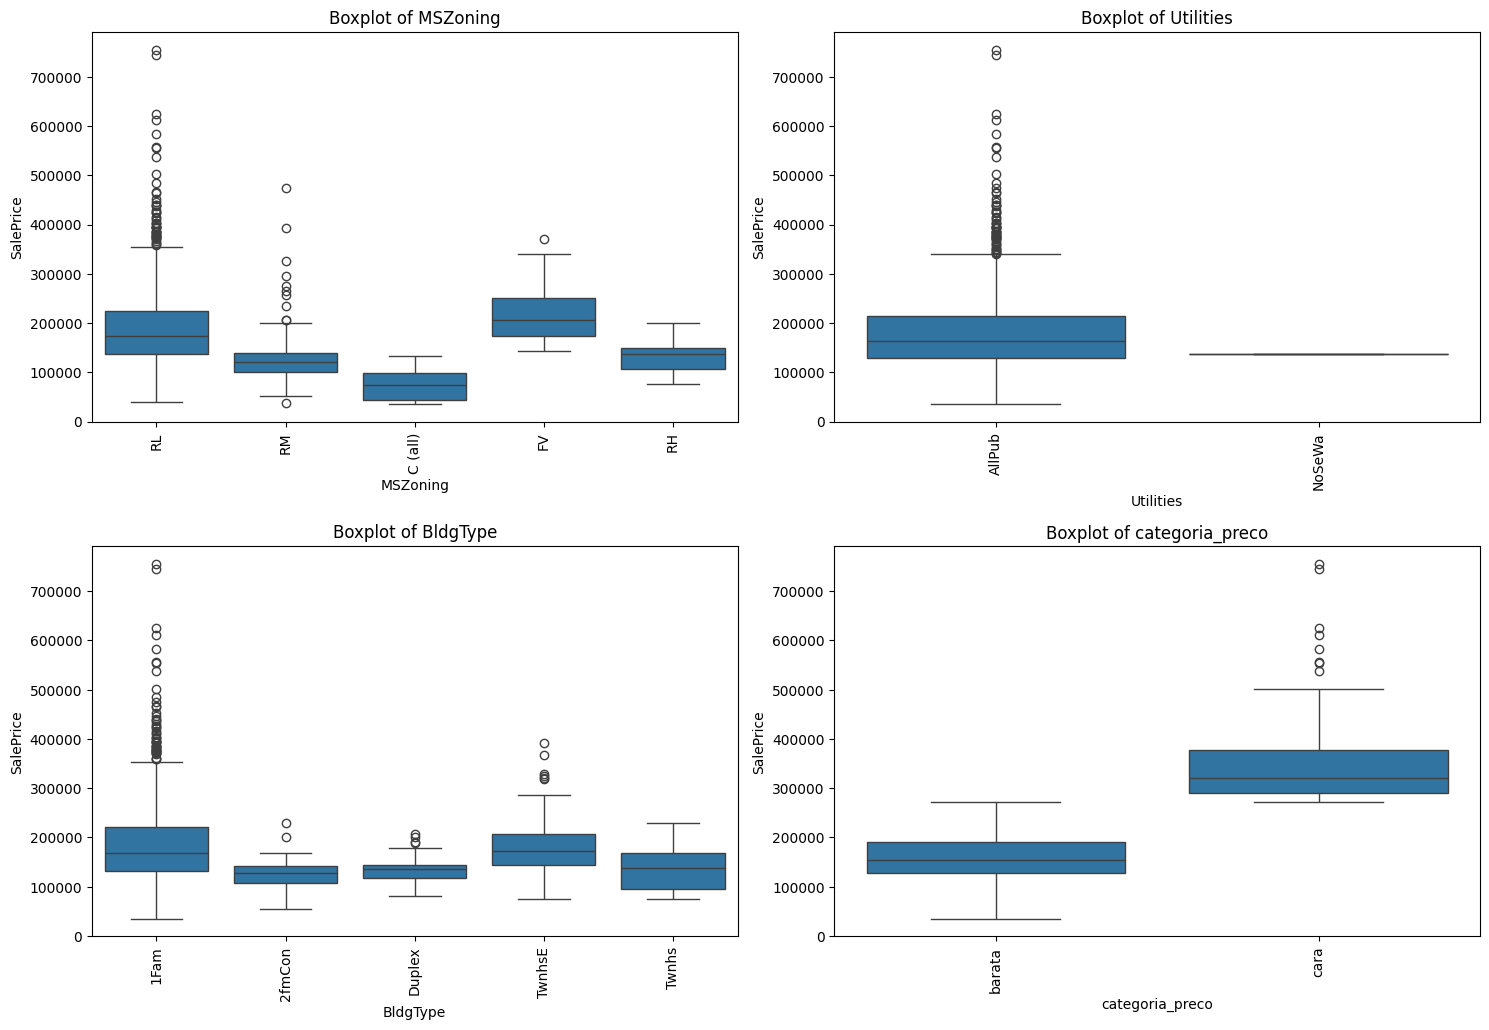

In [91]:
# Select categorical columns
colunas_categoricas = df.select_dtypes(include="object").columns

# Number of numeric columns
num_cols = len(colunas_numericas)

# Set the number of rows and columns for the chart grid
cols = 2  # Number of columns in the grid
rows = math.ceil(num_cols / cols)  # Calculate the required number of rows

# Create the figure and the axes for the chart grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate the boxplots
for idx, col in enumerate(colunas_categoricas):
    sns.boxplot(x=col, y='SalePrice', data=df, ax=axes[idx])
    axes[idx].set_title(f"Boxplot of {col}")
    axes[idx].tick_params(axis='x', rotation=90)

# Remove empty axes (if the number of plots is not a multiple of cols)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

From the graphs it is not possible to conclude much. Let's choose to perform some hypothesis tests to be sure and have our conclusions.

---
### 2- Hypothesis Tests:

#### **1- Does the quality of the house influence the price?**

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

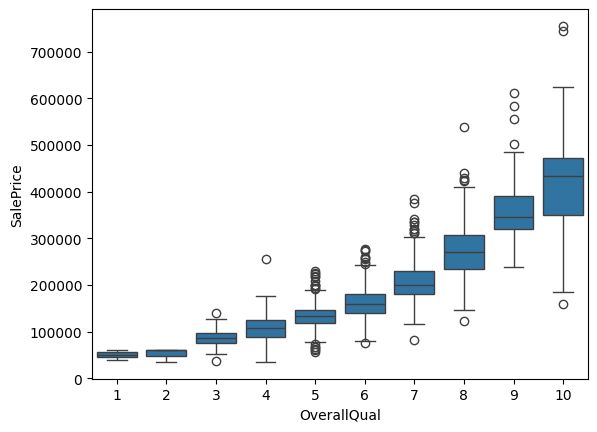

In [92]:
# boxplot between SalesPrice and OverallQual
sns.boxplot(x="OverallQual", y="SalePrice", data=df)


In [93]:
df.categoria_preco.value_counts()

,count
categoria_preco,
barata,1295
cara,165


Although the distribution is not normal, we will perform a parametric test because these are sets with more than 20 data in each sample.

- Ho: Average quality between expensive/cheap homes are **equal**.
- Ha: Average quality between expensive/cheap houses are **different**.

In [94]:
df.groupby("categoria_preco").OverallQual.var()

,OverallQual
categoria_preco,
barata,1.394055
cara,0.806726


Let's check if the population variances are the same or different. Let's perform a Levene test to verify the hypotheses.
- Ho: equal variances;
- Ha: Different variances


In [95]:
from scipy import stats

#Expensive houses
expensive = df[df.categoria_preco == "cara"].OverallQual
# Cheap houses
cheap = df[df.categoria_preco == "barata"].OverallQual

# Perform Levene's test for equality of variances
stat, p_value = stats.levene(expensive, cheap)

print(f"Test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05  # Significance level of 5%

if p_value < alpha:
    print("We reject the null hypothesis: the variances are different.")
else:
    print("We do not reject the null hypothesis: there is not enough evidence to say the variances are different.")

Test statistic: 22.6886
P-value: 0.0000
We reject the null hypothesis: the variances are different.


Therefore, we will perform a Student's t-test to compare the mean between two samples with different population variance.

In [96]:
# Perform independent t-test assuming unequal variances
t_stat, p_value = stats.ttest_ind(expensive, cheap, equal_var=False)  # equal_var=False for different variances

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpreting the result
alpha = 0.05  # Significance level (5%)
if p_value < alpha:
    print("We reject the null hypothesis: there is a significant difference between the groups.")
else:
    print("We do not reject the null hypothesis: there is not enough evidence to say the groups are different.")


T-statistic: 31.2821
P-value: 0.0000
We reject the null hypothesis: there is a significant difference between the groups.


#### **2- Is there a significant average price difference according to the area of residence?**

In [97]:
df["MSZoning"].value_counts()

,count
MSZoning,
RL,1151
RM,218
FV,65
RH,16
C (all),10


In [98]:
df.groupby(["MSZoning"]).SalePrice.var()

,SalePrice
MSZoning,
C (all),1.141838e+09
FV,2.742582e+09
RH,1.275498e+09
RL,6.523202e+09
RM,2.354354e+09


In this case we have more than two samples, where we want to check if there are significant differences in the average house prices. So let's use the ANOVA test which predicts that we can check if the averages differ if:

* Random samples
* Independent groups
* The dependent variable is continuous
* Samples have at least n = 15 each
* Population variances in each group is equal.

In [99]:
#separando each data group
lista_RL = df[df.MSZoning == "RL"].SalePrice
lista_RM = df[df.MSZoning == "RM"].SalePrice
lista_FV = df[df.MSZoning == "FV"].SalePrice
lista_C = df[df.MSZoning == "C (all)"].SalePrice


Let's use Levene's test for variances again.

In [100]:
# Assume we have four samples: group1, group2, group3, and group4
stat, p_value = stats.levene(lista_RL, lista_RM, lista_FV, lista_C)

print(f"Test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05  # Significance level of 5%

if p_value < alpha:
    print("We reject the null hypothesis: the variances are different.")
else:
    print("We do not reject the null hypothesis: there is not enough evidence to say the variances are different.")


Test statistic: 15.3797
P-value: 0.0000
We reject the null hypothesis: the variances are different.


As we do not have equal population variances, and we cannot guarantee the minimum amount of data in the samples, we will perform a non-parametric Kruskal Wallis test.

In [101]:
from scipy import stats

# Assume we have three or more samples (e.g., group1, group2, group3)
stat, p_value = stats.kruskal(lista_RL, lista_RM, lista_FV, lista_C)

print(f"Test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05  # Significance level of 5%

if p_value < alpha:
    print("We reject the null hypothesis: there is at least one significant difference between the groups.")
else:
    print("We do not reject the null hypothesis: there is not enough evidence to say the means are different.")


Test statistic: 261.3053
P-value: 0.0000
We reject the null hypothesis: there is at least one significant difference between the groups.


Now, to know which pair has different averages, let's use a post hoc test. Remembering that these data violate the approximation of data for normality and the samples do not have equal variances. We can't use Tukey in this case.

H0: considers the pairs to be equal
If p-value is less than 5%, we reject H0 and therefore say that the pairs are different

In [102]:
!pip install pingouin

In [103]:
import pingouin as pg
# Games Howell Non-Parametric Test
result = pg.pairwise_gameshowell(dv='SalePrice', between='MSZoning', data=df)
result.columns

Index(['A', 'B', 'mean(A)', 'mean(B)', 'diff', 'se', 'T', 'df', 'pval',
       'hedges'],
      dtype='object')

In [104]:
# Defining colors
RED = "\033[31m"
GREEN = "\033[32m"
RESET = "\033[0m"

for i, p_val in enumerate(result.pval):
    if p_val < 0.05:
        print(f"Comparison between {result.A.iloc[i]} and {result.B.iloc[i]}")
        print(f"P-value: {p_val:.4f}")
        print(f"{RED}We reject the null hypothesis: there is evidence of a significant difference between the groups.{RESET}")
        print()
    else:
        print(f"Comparison between {result.A.iloc[i]} and {result.B.iloc[i]}")
        print(f"P-value: {p_val:.4f}")
        print(f"{GREEN}We do not reject the null hypothesis: there is not enough evidence to say the means are different.{RESET}")
        print()


Comparison between C (all) and FV
P-value: 0.0000
We reject the null hypothesis: there is evidence of a significant difference between the groups.

Comparison between C (all) and RH
P-value: 0.0045
We reject the null hypothesis: there is evidence of a significant difference between the groups.

Comparison between C (all) and RL
P-value: 0.0000
We reject the null hypothesis: there is evidence of a significant difference between the groups.

Comparison between C (all) and RM
P-value: 0.0055
We reject the null hypothesis: there is evidence of a significant difference between the groups.

Comparison between FV and RH
P-value: 0.0000
We reject the null hypothesis: there is evidence of a significant difference between the groups.

Comparison between FV and RL
P-value: 0.0112
We reject the null hypothesis: there is evidence of a significant difference between the groups.

Comparison between FV and RM
P-value: 0.0000
We reject the null hypothesis: there is evidence of a significant difference 

### 3- Linear Regression

#### 1- Data processing:

- Removal of unused columns:

In [105]:
df = df.drop(columns=["Unnamed: 0", "Utilities", "categoria_preco"], axis=1)

- Treatment categorical variables

In [106]:
colunas_categoricas = df.select_dtypes(include="object").columns
df_encoded = pd.get_dummies(df,columns=colunas_categoricas, drop_first=True, prefix=colunas_categoricas)

In [107]:
df_encoded

,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,208500,7,5,3,8,1710,856,2003,False,False,True,False,False,False,False,False
1,181500,6,8,3,6,1262,1262,1976,False,False,True,False,False,False,False,False
2,223500,7,5,3,6,1786,920,2001,False,False,True,False,False,False,False,False
3,140000,7,5,3,7,1717,756,1915,False,False,True,False,False,False,False,False
4,250000,8,5,4,9,2198,1145,2000,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,5,3,7,1647,953,1999,False,False,True,False,False,False,False,False
1456,210000,6,6,3,7,2073,1542,1978,False,False,True,False,False,False,False,False
1457,266500,7,9,4,9,2340,1152,1941,False,False,True,False,False,False,False,False
1458,142125,5,6,2,5,1078,1078,1950,False,False,True,False,False,False,False,False


- Spli train and test:

In [108]:
#features
X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Treating Numerical Variables:

Since we have outliers, we're going to use the StandardScaler instead of the MinMax Scaler.

In [109]:
# Selecting numeric columns
colunas_numericas = X_train.select_dtypes(include=np.number).columns

# Instantiating the scaler
scaler = StandardScaler()

# Applying the scaler to the training data
X_train_scaled = X_train.copy()
X_train_scaled[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])

# Applying the same scaler to the test data
X_test_scaled = X_test.copy()
X_test_scaled[colunas_numericas] = scaler.transform(X_test[colunas_numericas])


In [110]:
X_train_scaled

,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
254,-0.820445,0.372217,0.136218,-0.964566,-0.407093,0.572612,-0.455469,False,False,True,False,False,False,False,False
1066,-0.088934,1.268609,0.136218,0.270755,0.083170,-0.596547,0.718609,False,False,True,False,False,False,False,False
638,-0.820445,1.268609,-1.106774,-1.582227,-1.395250,-0.603357,-1.988293,False,False,True,False,False,False,False,False
799,-0.820445,1.268609,0.136218,0.270755,0.458975,-0.750921,-1.107734,False,False,True,False,False,False,False,False
380,-0.820445,0.372217,0.136218,-0.346905,0.312087,-0.081209,-1.531707,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.088934,-0.524174,0.136218,-0.346905,-0.407093,0.572612,1.142582,False,False,True,False,False,False,False,False
1130,-1.551955,-2.316957,1.379210,0.270755,0.865302,0.136732,-1.401254,False,False,True,False,False,False,False,False
1294,-0.820445,1.268609,-1.106774,-0.964566,-1.265531,-0.448983,-0.520696,False,False,True,False,False,False,False,False
860,0.642577,2.165000,0.136218,0.270755,-0.193438,-0.340013,-1.727387,False,False,True,False,False,False,False,False


#### 2- Fazendo previsões

In [111]:
# Instantiating the Linear Regression model
model_linear = LinearRegression()

# Training the model
model_linear.fit(X_train_scaled, y_train)

# Making predictions on the test data
y_pred_test = model_linear.predict(X_test_scaled)

# Getting predicted values for the training data
y_pred_train = model_linear.predict(X_train_scaled)


With the trained model, let's compare the results on the graph.

Text(0, 0.5, 'Predicted Values')

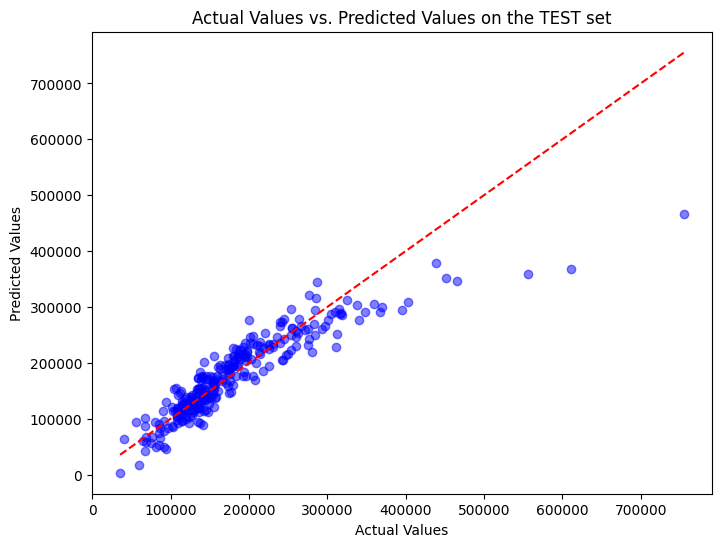

In [112]:
# Comparing actual test values with predicted values
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)

# Add an identity line (y = x), which represents where the actual values would equal the predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Add title and axis labels
plt.title('Actual Values vs. Predicted Values on the TEST set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


Let's look at the model metrics:

In [113]:
# R^2
r2_teste_linear = r2_score(y_test, y_pred_test)
print(f"R^2 on the test set: {r2_teste:.2f}")

r2_treino_linear = r2_score(y_train, y_pred_train)
print(f"R^2 on the training set: {r2_treino:.2f}")


R^2 on the test set: 0.82
R^2 on the training set: 0.77


The model performed better on the test data than on the training data. This can be an overfit. We will find out later.

Vamos verificar primeiro a importância das features para este modelo.

In [114]:
# Prompt: coefficients

# Model coefficients
coefficients = pd.DataFrame({'Feature': X_train_scaled.columns, 'Coefficient': model_linear.coef_})
print(coefficients)

# Most important coefficient
most_important_feature = coefficients.loc[coefficients['Coefficient'].abs().idxmax()]
print(f"\nThe most important feature for the prediction is '{most_important_feature['Feature']}' with a coefficient of {most_important_feature['Coefficient']}")


            Feature   Coefficient
0       OverallQual  26434.299353
1       OverallCond   6568.045336
2      BedroomAbvGr -11150.227419
3      TotRmsAbvGrd   7055.803845
4         GrLivArea  29639.277684
5       TotalBsmtSF  10354.413342
6         YearBuilt  17312.418857
7       MSZoning_FV  16821.741664
8       MSZoning_RH  13291.301917
9       MSZoning_RL  17723.573863
10      MSZoning_RM   8662.551560
11  BldgType_2fmCon  -1496.980462
12  BldgType_Duplex -17128.243139
13   BldgType_Twnhs -34981.513105
14  BldgType_TwnhsE -20958.147867

The most important feature for the prediction is 'BldgType_Twnhs' with a coefficient of -34981.51310549382


#### Analyzing Overfit:

Here we will apply the Ridge regularization to check if there has been overfit.

In [115]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), store_cv_values=True)
ridge_cv.fit(X_train_scaled, y_train)

# Best alpha value
print(f"Best alpha value: {ridge_cv.alpha_}")



Best alpha value: 10.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [116]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#Testando diferentes alphas para ridge
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)

    y_pred_train = ridge_model.predict(X_train_scaled)
    y_pred_test = ridge_model.predict(X_test_scaled)

    rmse_train_ridge = mean_squared_error(y_train, y_pred_train)
    rmse_test_ridge = mean_squared_error(y_test, y_pred_test)
    r2_train_ridge = r2_score(y_train, y_pred_train)
    r2_test_ridge = r2_score(y_test, y_pred_test)

    print(f"Alpha: {alpha}")
    print(f"Train RMSE: {rmse_train_ridge:.2f}, Test RMSE: {rmse_test_ridge:.2f}")
    print(f"Train R^2: {r2_train_ridge:.2f}, Test R^2: {r2_test_ridge:.2f}")
    print("-" * 20)

Alpha: 0.001
Train RMSE: 1344335113.50, Test RMSE: 1415872592.27
Train R^2: 0.77, Test R^2: 0.82
--------------------
Alpha: 0.01
Train RMSE: 1344335189.33, Test RMSE: 1415852041.83
Train R^2: 0.77, Test R^2: 0.82
--------------------
Alpha: 0.1
Train RMSE: 1344341613.30, Test RMSE: 1415692363.16
Train R^2: 0.77, Test R^2: 0.82
--------------------
Alpha: 1
Train RMSE: 1344562542.84, Test RMSE: 1415545996.12
Train R^2: 0.77, Test R^2: 0.82
--------------------
Alpha: 10
Train RMSE: 1348196524.32, Test RMSE: 1418857914.56
Train R^2: 0.77, Test R^2: 0.82
--------------------
Alpha: 100
Train RMSE: 1387124348.98, Test RMSE: 1492749176.90
Train R^2: 0.77, Test R^2: 0.81
--------------------


Even with Ridge's regularization, we don't see much impact between the results between training and testing. So we don't have overfitting the data.

# Using Decision Tree for Regression:

In [117]:
from sklearn.tree import DecisionTreeRegressor

# Instantiating the model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_train_tree = tree_model.predict(X_train_scaled)
y_pred_test_tree = tree_model.predict(X_test_scaled)

# Evaluation metrics
rmse_train_tree = mean_squared_error(y_train, y_pred_train)
rmse_test_tree = mean_squared_error(y_test, y_pred_test)
r2_train_tree = r2_score(y_train, y_pred_train)
r2_test_tree = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {rmse_train_tree:.2f}, Test RMSE: {rmse_test_tree:.2f}")
print(f"Train R^2: {r2_train_tree:.2f}, Test R^2: {r2_test_tree:.2f}")
print("-" * 20)


Train RMSE: 1387124348.98, Test RMSE: 1492749176.90
Train R^2: 0.77, Test R^2: 0.81
--------------------


The model using the decision tree has better metrics than using LinearRegression. Let's do a hyperparameter adjustment to see if we can improve the metrics even more.

In [118]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter range
param_grid = {
    "max_depth": [3, 5, 10],  # Reducing depth
    "min_samples_split": [5, 10, 20],  # Preventing excessive splits
    "min_samples_leaf": [5, 10, 20]  # Ensuring larger minimum leaf nodes
}

# Performing grid search for best parameters
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 5}


We will now retrain the model but choosing to use the parameters found.

In [119]:
# Instantiating the model
tree_model_grid = DecisionTreeRegressor(max_depth=10,
                                        min_samples_leaf=10,
                                        min_samples_split=5,
                                        random_state=42)

# Training the model
tree_model_grid.fit(X_train_scaled, y_train)

# Making predictions
y_pred_train = tree_model_grid.predict(X_train_scaled)
y_pred_test = tree_model_grid.predict(X_test_scaled)

# Evaluation metrics
rmse_train = mean_squared_error(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}")
print(f"Train R^2: {r2_train:.2f}, Test R^2: {r2_test:.2f}")


Train RMSE: 899709392.57, Test RMSE: 1479276507.64
Train R^2: 0.85, Test R^2: 0.81


* Feature Importance

Feature: OverallQual, Score: 0.75511
Feature: OverallCond, Score: 0.00321
Feature: BedroomAbvGr, Score: 0.01777
Feature: TotRmsAbvGrd, Score: 0.00248
Feature: GrLivArea, Score: 0.13335
Feature: TotalBsmtSF, Score: 0.06248
Feature: YearBuilt, Score: 0.02431
Feature: MSZoning_FV, Score: 0.00000
Feature: MSZoning_RH, Score: 0.00000
Feature: MSZoning_RL, Score: 0.00000
Feature: MSZoning_RM, Score: 0.00000
Feature: BldgType_2fmCon, Score: 0.00000
Feature: BldgType_Duplex, Score: 0.00000
Feature: BldgType_Twnhs, Score: 0.00129
Feature: BldgType_TwnhsE, Score: 0.00000


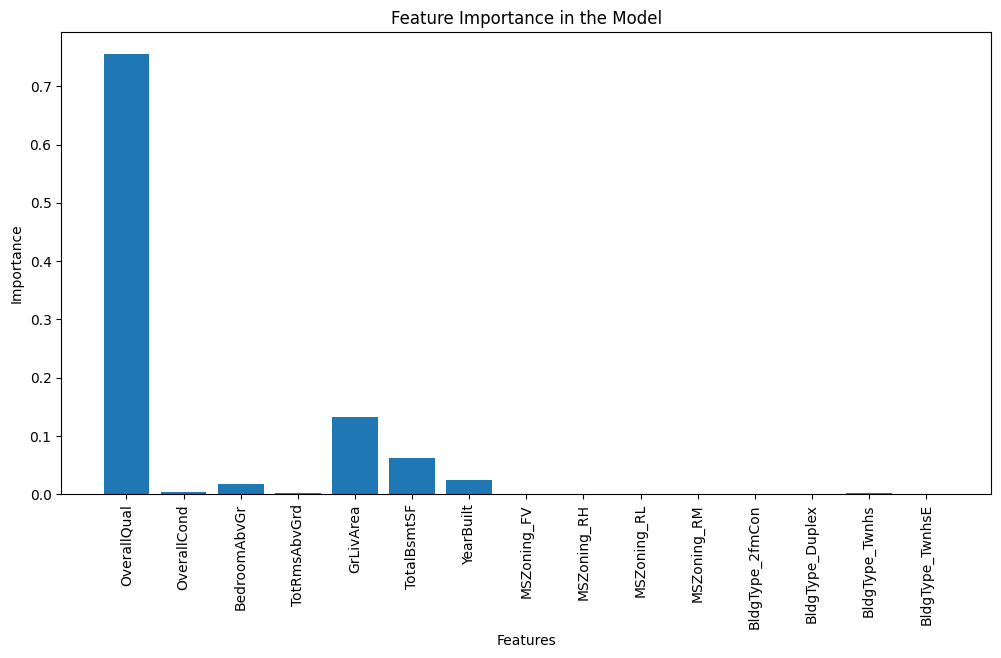

In [120]:
# Obtaining the feature importances
importance = tree_model_grid.feature_importances_

# Getting the column names of the dataset
feature_names = X_train.columns  # Assuming X_train is the DataFrame with the features

# Displaying the importance of each feature with its name
for name, score in zip(feature_names, importance):
    print(f'Feature: {name}, Score: {score:.5f}')

# Plotting the feature importances
plt.figure(figsize=(12, 6))  # Define a larger size for better visualization
plt.bar(feature_names, importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in the Model")
plt.xticks(rotation=90)  # Rotating the names to avoid overlapping
plt.show()


Let's simplify the model to only those features that have some weight for the predictions, in an attempt to simplify the regression model.

In [121]:
# Create a DataFrame with feature names and importances
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": tree_model_grid.feature_importances_
})

# Filter only the features with importance greater than a threshold (e.g., 0.01)
threshold = 0.01
important_features = feature_importance[feature_importance["Importance"] > threshold]["Feature"].tolist()

print(f"Selected features ({len(important_features)}):")
print(important_features)

# Update X_train and X_test with only these features
X_train_selected = X_train_scaled[important_features]
X_test_selected = X_test_scaled[important_features]

Selected features (5):
['OverallQual', 'BedroomAbvGr', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']


In [122]:
# Training the model
tree_model_grid.fit(X_train_selected, y_train)

# Making predictions
y_pred_train = tree_model_grid.predict(X_train_selected)
y_pred_test = tree_model_grid.predict(X_test_selected)

# Evaluation metrics
rmse_train = mean_squared_error(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}")
print(f"Train R^2: {r2_train:.2f}, Test R^2: {r2_test:.2f}")


Train RMSE: 919512759.77, Test RMSE: 1483822088.00
Train R^2: 0.85, Test R^2: 0.81


In [123]:
resid_train = y_train - y_pred_train
resid_test = y_test - y_pred_test

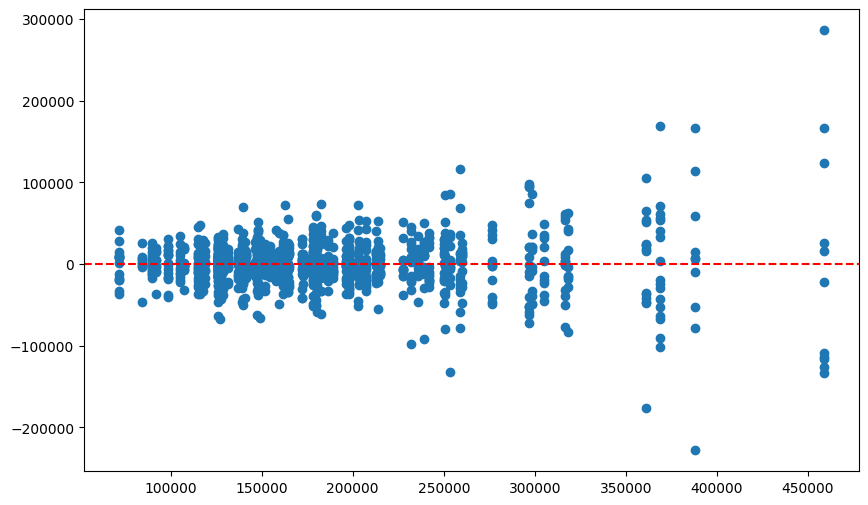

In [124]:
# Plotting the training residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, resid_train)
plt.axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at y=0


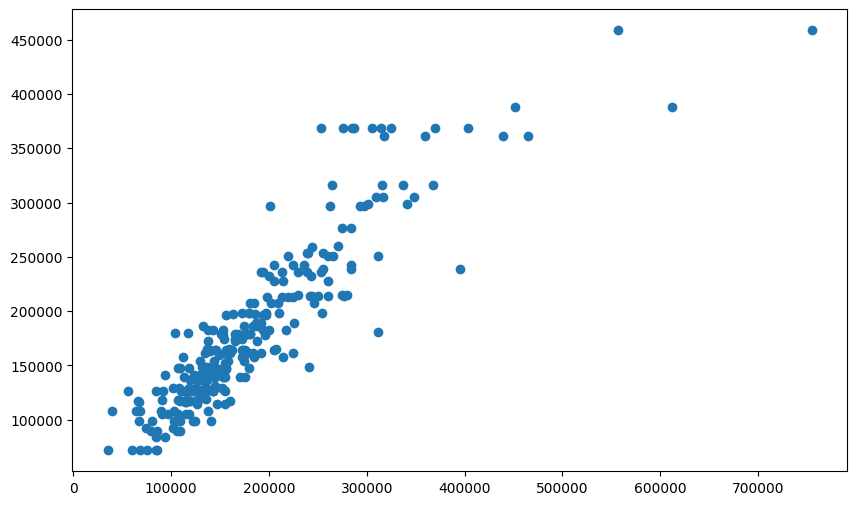

In [125]:
# Comparing predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test)


Text(0, 0.5, 'Predicted Values')

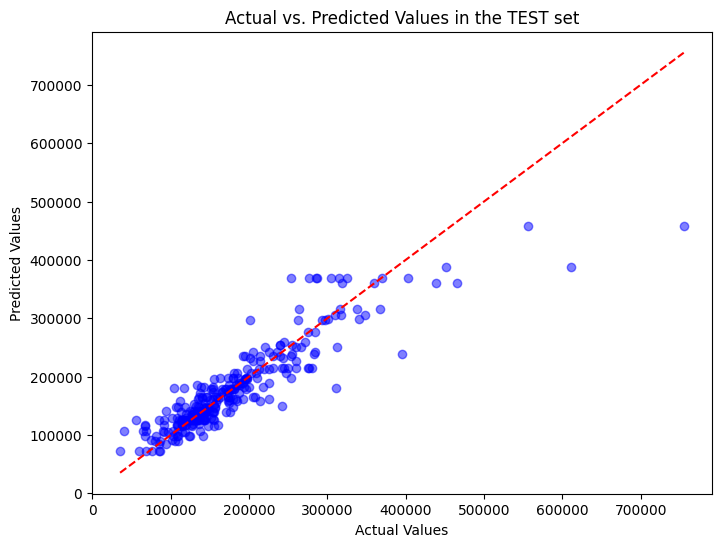

In [126]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)

# Add an identity line (y = x), representing where the actual values would equal the predicted ones
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Add title and axis labels
plt.title('Actual vs. Predicted Values in the TEST set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


#### Random Forest para Regressão

In [127]:
# Instantiating a RandomForest model
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=400,
                                 max_features='sqrt',
                                 max_depth=10,
                                 random_state=42)

# Training the model
model_rf.fit(X_train_scaled, y_train)

# Making predictions on train and test sets
y_pred_train_rf = model_rf.predict(X_train_scaled)
y_pred_test_rf = model_rf.predict(X_test_scaled)

# Calculating performance metrics
rmse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
rmse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

# Displaying the results of the metrics
print(f"Train RMSE: {rmse_train_rf:.2f}, Test RMSE: {rmse_test_rf:.2f}")
print(f"Train R^2: {r2_train_rf:.2f}, Test R^2: {r2_test_rf:.2f}")


Train RMSE: 291719426.23, Test RMSE: 874323942.54
Train R^2: 0.95, Test R^2: 0.89


We will do a cross-validation to check if there has been overfit in the data. Because although the difference in R^2 metrics is still acceptable, the RMSE in the Test is very high compared to training. This may indicate that the data is adjusting too much to the training and failing to generalize in the test.

In [128]:
# Performing cross-validation for R² score
cv_r2 = cross_val_score(model_rf, X_train_scaled, y_train, cv=5, scoring="r2")

# Performing cross-validation for RMSE (negative mean squared error, so we negate it)
cv_rmse = cross_val_score(model_rf, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")

# Displaying the results of cross-validation
print(f"Cross-Validation R²: {cv_r2.mean():.2f} ± {cv_r2.std():.2f}")
print(f"Cross-Validation RMSE: {(-cv_rmse.mean())**0.5:.2f}")

Cross-Validation R²: 0.84 ± 0.04
Cross-Validation RMSE: 30443.93


The r^2 suggests a slight overfit, although still acceptable, as it generalizes well in the test data.

In [134]:
# Instantiating the RandomForest model
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=400,  # Number of trees in the forest
                                 max_features='sqrt',  # Max features to consider when splitting a node
                                 max_depth=8,  # Maximum depth of the tree
                                 random_state=42)  # For reproducibility

# Training the model
model_rf.fit(X_train_scaled, y_train)

# Making predictions on the training and test sets
y_pred_train_rf2 = model_rf.predict(X_train_scaled)
y_pred_test_rf2 = model_rf.predict(X_test_scaled)

# Calculating performance metrics
rmse_train_rf2 = mean_squared_error(y_train, y_pred_train_rf2)  # Root Mean Squared Error for training
rmse_test_rf2 = mean_squared_error(y_test, y_pred_test_rf2)  # Root Mean Squared Error for testing
r2_train_rf2 = r2_score(y_train, y_pred_train_rf2)  # R-squared for training
r2_test_rf2 = r2_score(y_test, y_pred_test_rf2)  # R-squared for testing

# Displaying the results of the metrics
print(f"Train RMSE: {rmse_train_rf2:.2f}, Test RMSE: {rmse_test_rf2:.2f}")
print(f"Train R^2: {r2_train_rf2:.2f}, Test R^2: {r2_test_rf2:.2f}")


Train RMSE: 447914072.47, Test RMSE: 926367520.03
Train R^2: 0.92, Test R^2: 0.88


In [130]:
from sklearn.model_selection import cross_val_score
cv_r2 = cross_val_score(model_rf, X_train_scaled, y_train, cv = 5, scoring = "r2")
cv_rmse = cross_val_score(model_rf, X_train_scaled, y_train, cv= 5, scoring = "neg_mean_squared_error")

print(f"Cross-Validation R²: {cv_r2.mean():.2f} ± {cv_r2.std():.2f}")
print(f"Cross-Validation RMSE: {(-cv_rmse.mean())**0.5:.2f}")

Cross-Validation R²: 0.83 ± 0.04
Cross-Validation RMSE: 31387.57


In [135]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = mean_absolute_percentage_error(y_train, y_pred_train_rf2)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test_rf2)

print(f"Train MAPE: {mape_train:.2f}%, Test MAPE: {mape_test:.2f}%")


Train MAPE: 9.09%, Test MAPE: 12.06%


Here, the latter model presents better metrics. With higher R^2 for training and testing and with a good MAPE. In other words, we have a MAPE of 12%. Which means that the model is wrong on average 12% of the actual values.

In [142]:
#comparing all metrics
print(f"Linear Regression:")
print(f"Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}")
print(f"Train R^2: {r2_train:.2f}, Test R^2: {r2_test:.2f}")
print(f"Train MAPE: {mean_absolute_percentage_error(y_train, y_pred_train):.2f}%, Test MAPE: {mean_absolute_percentage_error(y_test, y_pred_test):.2f}%")
print('-'*60)
print(f"Decision Tree:")
print(f"Train RMSE: {rmse_train_tree:.2f}, Test RMSE: {rmse_test_tree:.2f}")
print(f"Train R^2: {r2_train_tree:.2f}, Test R^2: {r2_test_tree:.2f}")
print(f"Train MAPE: {mean_absolute_percentage_error(y_train, y_pred_train_tree):.2f}%, Test MAPE: {mean_absolute_percentage_error(y_test, y_pred_test_tree):.2f}%")
print('-'*60)
print(f"Random Forest:")
print(f"Train RMSE: {rmse_train_rf2:.2f}, Test RMSE: {rmse_test_rf2:.2f}")
print(f"Train R^2: {r2_train_rf2:.2f}, Test R^2: {r2_test_rf2:.2f}")
print(f"Train MAPE: {mape_train:.2f}%, Test MAPE: {mape_test:.2f}%")



Linear Regression:
Train RMSE: 374240411.54, Test RMSE: 938818405.14
Train R^2: 0.94, Test R^2: 0.88
Train MAPE: 8.67%, Test MAPE: 12.59%
------------------------------------------------------------
Decision Tree:
Train RMSE: 1387124348.98, Test RMSE: 1492749176.90
Train R^2: 0.77, Test R^2: 0.81
Train MAPE: 13.71%, Test MAPE: 16.35%
------------------------------------------------------------
Random Forest:
Train RMSE: 447914072.47, Test RMSE: 926367520.03
Train R^2: 0.92, Test R^2: 0.88
Train MAPE: 9.09%, Test MAPE: 12.06%


Therefore, the chosen model would be **RandomForestRegressor.**